Possible Data analyses 
- Age of officers (done)
- Race of officers (done)
- Complaints per year (done)
- Race of complaints (done)
- Age of complaints (done)
- Graph of officers most to least (done - top 20 in df)
- Graph of precints most to least (done - top 20 in df)
- Type of complaint (Graph done - percentage)
- Substantiated complaints vs unsubstantiated, description of why this is problematic to investigate your own crimes (done + percentages)
- Type of complaint wrt substantiated
- Substantiated - wrt year (to see if there are more substantiated complaints now than before) 
- Substantiated male vs female 
- Heatmap - correlation between race
- Race of citizen 
- Correlation graph between race, black to white, white to black, asian to white etc 


https://www1.nyc.gov/site/ccrb/policy/data-transparency-initiative-mos.page#complaint_sub

https://gothamist.com/news/nypd-police-ccrb-database-shows-confirmed-record-misconduct

This report needs to be split into three parts 
part 1 = exploratory analysis of all allegations 
part 2 = Explanation of police investigation their own crimes 
part 3 = Substantiated allegations and complaints 



In [2]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


/anaconda3/lib/python3.7/site-packages/scipy/__init__.py:137: UserWarning: NumPy 1.16.5 or above is required for this version of SciPy (detected version 1.16.2)
  UserWarning)


In [3]:
nypd_allegations = pd.read_csv("/Users/jordancreenaune/Desktop/Python_for_Data_Science/Jordan_Projects/NYPD_Allegations/allegations.csv")

#A snapshot of the data.
nypd_allegations.head(3)

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)


In [4]:
nypd_allegations.describe()

,unique_mos_id,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
count,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,28546.000000,33334.000000
mean,18169.912495,23905.058217,6.323551,2010.726782,6.470772,2011.525661,32.346873,32.484201,64.365213
std,9566.316896,11954.434138,3.362951,6.034725,3.343372,6.085907,6.040944,28.408963,31.451592
min,2.000000,517.000000,1.000000,1985.000000,1.000000,1985.000000,20.000000,-4301.000000,0.000000
25%,9671.000000,13684.750000,3.000000,2007.000000,4.000000,2008.000000,28.000000,23.000000,43.000000
50%,19215.000000,25132.000000,6.000000,2012.000000,6.000000,2013.000000,31.000000,30.000000,67.000000
75%,25412.000000,34252.000000,9.000000,2016.000000,9.000000,2016.000000,36.000000,41.000000,81.000000
max,36374.000000,43703.000000,12.000000,2020.000000,12.000000,2020.000000,60.000000,101.000000,1000.000000


/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


<IPython.core.display.Javascript object>


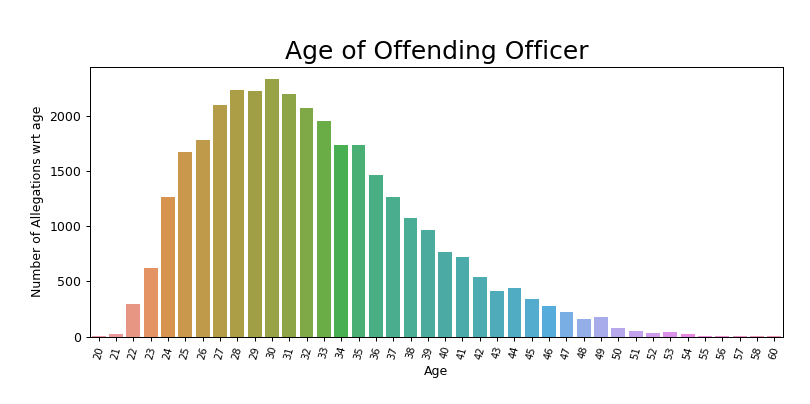

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Allegations wrt age')

In [5]:
#age of officers - breakdown 

nypd_allegations_cleaned = nypd_allegations[nypd_allegations.mos_age_incident != '(null)']

off_age_clean = pd.to_numeric(nypd_allegations_cleaned['mos_age_incident'])
#Plotting histogram
#plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,5))
sns.countplot(off_age_clean.astype(int))
plt.title("Age of Offending Officer", fontsize = 20)
plt.xlabel('Age', fontsize = 10)

plt.xticks(fontsize = 8, rotation = 75)

plt.subplots_adjust(left=0.1, bottom=0.25, right=0.87, top=0.85)
plt.ylabel('Number of Allegations wrt age', fontsize = 10)


In [7]:
# Race of officers - Graph 
OfficerEthnicity = nypd_allegations['mos_ethnicity']
RaceValue = OfficerEthnicity.unique()

RaceCount = OfficerEthnicity.value_counts()
RaceCount

White              18074
Hispanic            9150
Black               4924
Asian               1178
American Indian       32
Name: mos_ethnicity, dtype: int64

<IPython.core.display.Javascript object>


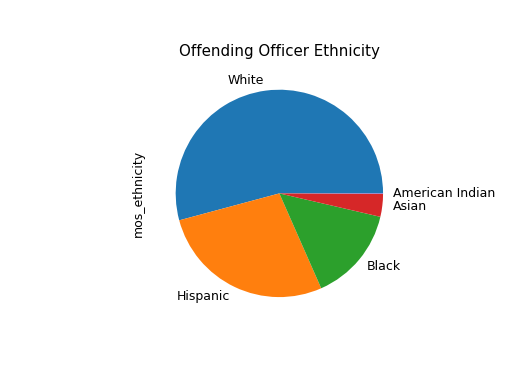

Text(0.5, 1.0, 'Offending Officer Ethnicity')

In [8]:
#This graph below details the ethnicity of the Police Officer who is receiving the complaint.
plt.figure(2)
nypd_allegations['mos_ethnicity'].value_counts().plot(kind='pie')
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.87, top=0.85)
explode = (0, 0.05, 0.1, 0.15, 0.2)
plt.title('Offending Officer Ethnicity')


<IPython.core.display.Javascript object>


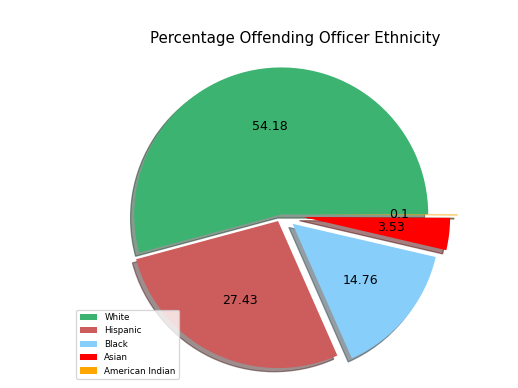

In [9]:
#This graph is a breakdown of the race of the officer receiving the complaint. 
#Please note that these are unique complaints. 
#Many officers received multiple complaints during their employment. 
#This will be covered later in this portfolio.

suspect_ethnicity = nypd_allegations['mos_ethnicity']
ethnicity_count = suspect_ethnicity.value_counts()
ethnicity_value = suspect_ethnicity.unique()
total_rows = len(nypd_allegations)

plt.figure(3)
labels = ethnicity_value
#sizes = nypd_allegations['mos_ethnicity'].value_counts().sort_index() / total_rows*100
sizes = ((ethnicity_count / total_rows) * 100)
colors = ['mediumseagreen', 'indianred', 'lightskyblue', 'red', 'orange']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a
explode = (0, 0.05, 0.1, 0.15, 0.2)
plt.pie(sizes, colors=colors,
        autopct=absolute_value, shadow=True, explode=explode)
plt.title('Percentage Offending Officer Ethnicity')

plt.legend(labels=ethnicity_count.index,loc=3, prop={'size': 7})


plt.axis('equal')
plt.show()


In [10]:
#This will contain male female comparison - percentage 
#Isolate values of sex count for the data set 

In [11]:
# Gender of Member of Service
OfficerGender = nypd_allegations['mos_gender']
GenderValue = OfficerGender.unique()

GenderCount = OfficerGender.value_counts()
GenderCount


M    31598
F     1760
Name: mos_gender, dtype: int64

<IPython.core.display.Javascript object>


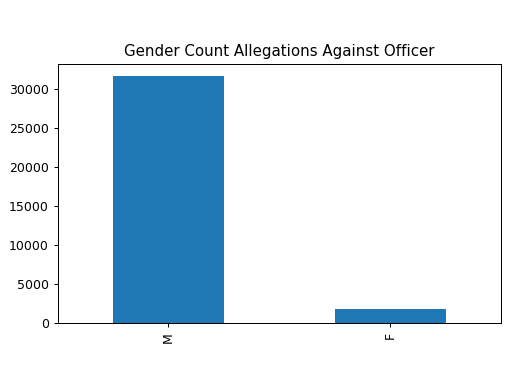

Text(0.5, 1.0, 'Gender Count Allegations Against Officer')

In [13]:
#This graph below details the Gender of the Police Officer who is receiving the complaint.
plt.figure(4)
nypd_allegations['mos_gender'].value_counts().plot(kind='bar')
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.87, top=0.85)
plt.title('Gender Count Allegations Against Officer')

In [131]:
#This will calculate the percentage of male vs female officer complaints - needs to be compared with 

totalcount = len(nypd_allegations.index)
gender = nypd_allegations['mos_gender'].value_counts()

malepercent = (gender.iloc[0]/totalcount)*100
femalepercent = (gender.iloc[1]/totalcount)*100
print(malepercent)
print(femalepercent)

94.72390431081
5.27609568919


As of 02/02/2021, the gender breakdown of the NYPD police force is 81% Male (28,382) and 19% Female (6,578). If allegation rates were consistent with the population of police officers the rate of allegations should be similar to the gender breakdown of the force. As the comparison between these two data sets reveals, this is not the case. 

https://www1.nyc.gov/site/ccrb/policy/data-transparency-initiative-mos.page

As a comparison - we can see the breakdown of these complaints and see if they can be compared with gender demographics 

In [62]:
#this comparison will not work as the complaints are across multiple years 
#need that male female comparison over the average per year with regard to total number of men and woe

In [132]:
#The following graph will give a breakdown of each year 

#Groupby and count the amount of allegations per year
date = nypd_allegations.groupby(nypd_allegations['year_received']).count()
#select first two columns of data frame using index (iloc)
date = date.iloc[:, 0:1]
#Reset column 1 to title of the column
date.reset_index(inplace=True)


<IPython.core.display.Javascript object>


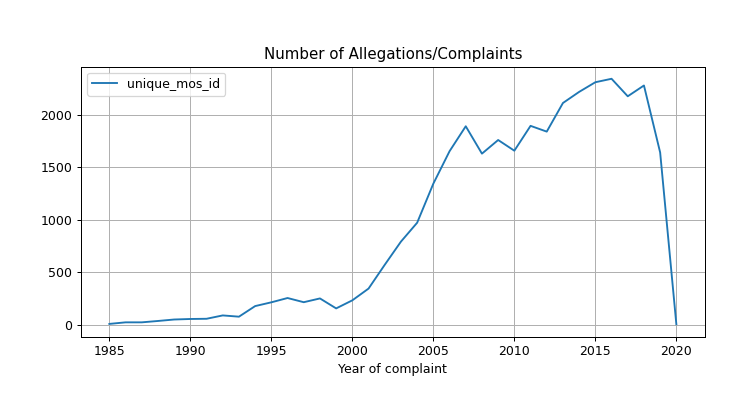

In [65]:

date.set_index('year_received').plot(figsize=(9,5), grid=True)
plt.title('Number of Allegations/Complaints')
plt.xlabel('Year of complaint', fontsize = 10)
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.87, top=0.85)


In [66]:
#find the top 20 worst offenders - 

#Isolate three columns 
mosId = nypd_allegations.iloc[:, 0:3]
#Groupby to find total complaints of a single officer 
mosId = mosId.groupby(mosId.columns.tolist()).size().reset_index().\
    rename(columns={0:'total'})
#Sort by total column of 
Id_sort = mosId.sort_values('total',ascending = False)
Id_sort.reset_index(drop=True, inplace=True)
Idsort = Id_sort.head(20)
#Prints to markdown cell 
print(Idsort.to_markdown())

|    |   unique_mos_id | first_name   | last_name    |   total |
|---:|----------------:|:-------------|:-------------|--------:|
|  0 |           18731 | Daniel       | Sbarra       |      75 |
|  1 |           25861 | Mathew       | Reich        |      75 |
|  2 |           18530 | Joseph       | Tallarine    |      73 |
|  3 |           19489 | Gary         | Messina      |      73 |
|  4 |           18589 | Christophe   | Mccormack    |      72 |
|  5 |           25814 | William      | Taylor       |      65 |
|  6 |           22775 | David        | Cheesewright |      63 |
|  7 |           20982 | Mike         | Civil        |      56 |
|  8 |           25478 | Paul         | Mcmahon      |      56 |
|  9 |           32054 | Michael      | Raso         |      50 |
| 10 |           25785 | Matthew      | Lewis        |      47 |
| 11 |           26487 | Trevor       | Baronette    |      47 |
| 12 |           22881 | David        | Grieco       |      46 |
| 13 |           10436 | 

In [67]:
#Reference and isolate column detailing precinct 
PrecinctTotal = nypd_allegations.iloc[:, 22].to_frame()

#Groupby to find total complaints of each precinct, create new column with total
PrecinctTotal = PrecinctTotal.groupby(PrecinctTotal.columns.tolist()).size().reset_index().\
    rename(columns={0:'total'})

PrecinctTotal  = PrecinctTotal .sort_values('total',ascending = False)
PrecinctTotal.reset_index(drop=True, inplace=True)
PrecinctTotal = PrecinctTotal .head(20)
#Prints to markdown cell 
print(PrecinctTotal.to_markdown())

|    |   precinct |   total |
|---:|-----------:|--------:|
|  0 |         75 |    2172 |
|  1 |         73 |    1163 |
|  2 |         44 |    1139 |
|  3 |         46 |    1120 |
|  4 |         67 |    1119 |
|  5 |         79 |    1062 |
|  6 |         40 |    1009 |
|  7 |         77 |     950 |
|  8 |         47 |     944 |
|  9 |        120 |     844 |
| 10 |         81 |     806 |
| 11 |         43 |     772 |
| 12 |         52 |     759 |
| 13 |         70 |     713 |
| 14 |        113 |     704 |
| 15 |         32 |     684 |
| 16 |         48 |     662 |
| 17 |         42 |     653 |
| 18 |         83 |     648 |
| 19 |         71 |     648 |


In [68]:
#Substantiated vs Unsubstansitated complaints - and the problematic issues that arise from
#investigating your own crimes as a police force 

#Isolate column to get an idea of what the string will look like.
#We need to isolate the first word 

SubVsUn = nypd_allegations['board_disposition']
SubVsUn.head()

0    Substantiated (Command Lvl Instructions)
1                     Substantiated (Charges)
2                     Substantiated (Charges)
3                     Substantiated (Charges)
4        Substantiated (Command Discipline A)
Name: board_disposition, dtype: object

<IPython.core.display.Javascript object>


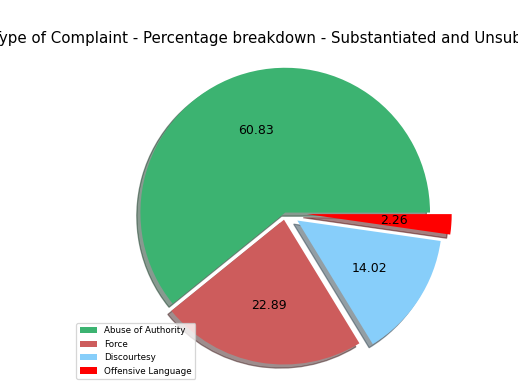

In [141]:
#Percentage Breakdown of Complaints - Substantiated and Unsubstantiated 

#Type of complaint - 

type_complaint = nypd_allegations['fado_type'].value_counts()
type_complaint


type_complaint = nypd_allegations['fado_type']
type_complaint_count = type_complaint.value_counts()
type_complaint_value = type_complaint.unique()
total_rows = len(nypd_allegations)

plt.figure(7)
labels = type_complaint_value
#sizes = nypd_allegations['mos_ethnicity'].value_counts().sort_index() / total_rows*100
sizes = ((type_complaint_count / total_rows) * 100)
colors = ['mediumseagreen', 'indianred', 'lightskyblue', 'red']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a
explode = (0, 0.05, 0.1, 0.15)
plt.pie(sizes, colors=colors,
        autopct=absolute_value, shadow=True, explode=explode)
plt.title('Type of Complaint - Percentage breakdown - Substantiated and Unsubstantiated')

plt.legend(labels=type_complaint_count.index,loc=3, prop={'size': 7})


plt.axis('equal')
plt.show()

In [69]:
#Extract the first word from the column labeled board disposition - BEWARE THIS CODE IS SLOW

# SubUnsub = [nypd_allegations.board_disposition.str.split(' ')[index][0]
#              for index in range(0, len(nypd_allegations))]
# #print(SubUnsub)

# #Print to string, next, count instances of Substantiated and Unsubstantiated
# #initialise variables 
# word1 = "Substantiated"
# word2 = "Unsubstantiated"

# #Count instances of substantiated and unsubstantiated in the column
# count1 = SubUnsub.count(word1)
# count2 = SubUnsub.count(word2)


In [70]:
# Intialise data of lists - print this to data frame and save as CSV because the above code is slow
# Join ints together in one df
# data = {'Substantiated':[count1],
#         'Unsubstantiated':[count2]}
  
# # Create DataFrame
# SubUnsubdf = pd.DataFrame(data)
  
# # Print the output to csv because the above code is super slow 
# SubUnsubdf.to_csv('SubUnsubdf.csv')

In [71]:
# Import CSV with data on substantiated vs unsubstantiated 
SubUnsub = pd.read_csv("/Users/jordancreenaune/Desktop/Python_for_Data_Science/Jordan_Projects/NYPD_Allegations/SubUnsubdf.csv")
#drop column 1 which was redundant 
SubUnsub.drop(['Unnamed: 0'], axis =1)

,Substantiated,Unsubstantiated
0,8301,15448


In [72]:
#need to find percentage of substantiated wrt unsub 
sub = SubUnsub['Substantiated']
unsub = SubUnsub['Unsubstantiated']

subpercentage = (sub / ((sub + unsub))*100)
print(subpercentage)
ubsubpercentage = (unsub / ((sub + unsub))*100)
print(ubsubpercentage)

0    34.953051
dtype: float64
0    65.046949
dtype: float64


<IPython.core.display.Javascript object>


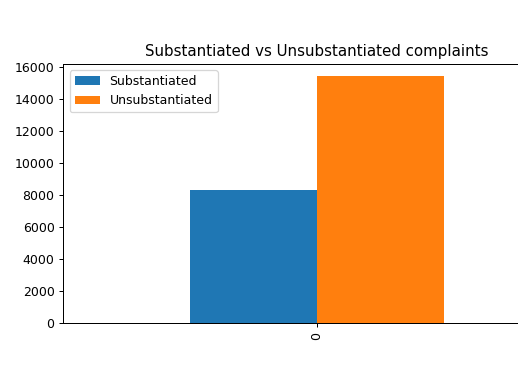

In [137]:
# Keep in mind, the complexity behind the NYPD investigating their own complaints
plt.figure(5)
SubUnsub[['Substantiated','Unsubstantiated']].plot(kind='bar')
plt.title('Substantiated vs Unsubstantiated complaints')
plt.subplots_adjust(left=0.11, bottom=0.25, right=0.99, top=0.85)
plt.show()

Abuse of Authority    20292
Force                  7636
Discourtesy            4677
Offensive Language      753
Name: fado_type, dtype: int64

In [75]:
#Type of Allegation 
allegation = Type_Complaint = nypd_allegations['allegation'].value_counts()
allegation


Physical force                              4849
Word                                        3942
Stop                                        2300
Search (of person)                          2047
Frisk                                       1926
                                            ... 
Failed to Obtain Language Interpretation       2
Other Asian                                    1
Sexist Remark                                  1
Oriental                                       1
Questioned immigration status                  1
Name: allegation, Length: 115, dtype: int64

In [133]:

correlation = nypd_allegations.corr()
correlation

,unique_mos_id,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
unique_mos_id,1.000000,-0.104450,-0.008735,-0.109900,0.017320,-0.109504,-0.013019,-0.004951,0.084325
complaint_id,-0.104450,1.000000,-0.002005,0.967972,-0.039091,0.958768,0.279957,0.055747,0.037677
month_received,-0.008735,-0.002005,1.000000,-0.047570,-0.031569,0.000241,0.006051,0.012332,-0.010726
year_received,-0.109900,0.967972,-0.047570,1.000000,-0.027270,0.995375,0.289561,0.057706,0.032681
month_closed,0.017320,-0.039091,-0.031569,-0.027270,1.000000,-0.076248,-0.014238,-0.019576,-0.009729
year_closed,-0.109504,0.958768,0.000241,0.995375,-0.076248,1.000000,0.288654,0.057621,0.032051
mos_age_incident,-0.013019,0.279957,0.006051,0.289561,-0.014238,0.288654,1.000000,0.038182,-0.027145
complainant_age_incident,-0.004951,0.055747,0.012332,0.057706,-0.019576,0.057621,0.038182,1.000000,-0.013831
precinct,0.084325,0.037677,-0.010726,0.032681,-0.009729,0.032051,-0.027145,-0.013831,1.000000


In [ ]:
plt.figure(7)
sns.heatmap(nypd_allegations.corr());
plt.subplots_adjust(left=0.15, bottom=0.5, right=0.9, top=0.85)



In [ ]:

#correlation matrix between races 
RaceCorrelation = nypd_allegations[['mos_ethnicity', 'complainant_ethnicity']]

RaceCorrelation['mos_ethnicity']=RaceCorrelation['mos_ethnicity'].astype('category').cat.codes
RaceCorrelation['complainant_ethnicity']=RaceCorrelation['complainant_ethnicity'].astype('category').cat.codes
RaceCorrelation = RaceCorrelation.corr()

In [ ]:
RaceCorrelation

In [ ]:
plt.figure(8)
sns.heatmap(RaceCorrelation.corr());